In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [2]:
import pandas as pd  # Подгрузим пакет 

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 

df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

In [12]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

NameError: name 'df_melt' is not defined

In [4]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


### Начнем с датасета про морских гребешков

In [5]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [6]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [7]:
stats.ttest_ind(df['A'],  df['C'])

Ttest_indResult(statistic=-0.6374552583116757, pvalue=0.541638025048848)

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [8]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [110]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
 


# Сравнение групп

stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=50.000, p=0.106
Одинаковые распределения (не отвергаем H0)


In [10]:
np.mean(group_1), np.mean(group_2)

(21.0, 22.75)

In [11]:
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()

**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [9]:
 

from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_2)
#stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=10.500, p=0.044
Разные распределения (отвергаем H0)


D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [13]:
  
# pd.DataFrame(group_1).hist()
# pd.DataFrame(group_2).hist()    

# Задания для самостоятельного решения

**Замечание:** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)


(array([ 1.,  2.,  6., 12., 19., 18., 19., 11.,  9.,  3.]),
 array([-68.59955678, -54.16957782, -39.73959887, -25.30961991,
        -10.87964096,   3.550338  ,  17.98031695,  32.41029591,
         46.84027486,  61.27025382,  75.70023277]),
 <BarContainer object of 10 artists>)

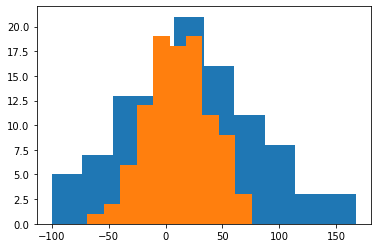

In [8]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
print(stats.ttest_ind(A, B))

plt.hist(B)
plt.hist(A)

### Достаточных оснований для того, чтобы отклонить нулевую гипотезу у нас нет

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

Statistics=4343.00, p=0.054


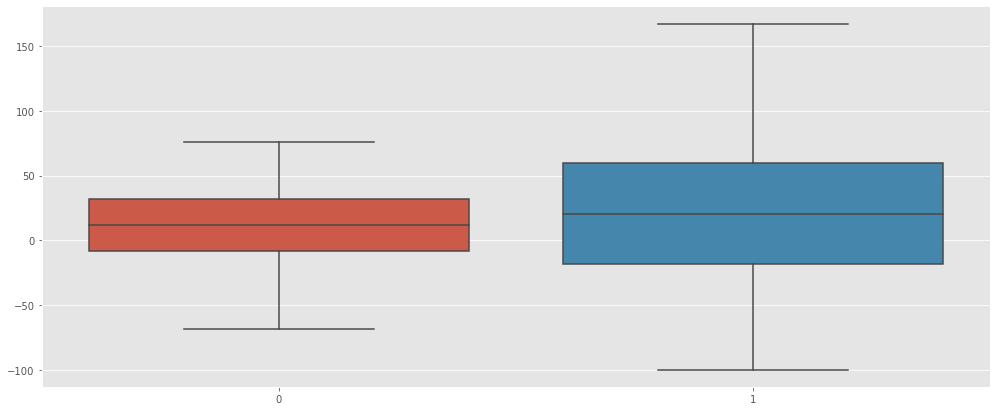

In [111]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

stat, p = mannwhitneyu(A, B)
print(f'Statistics={stat:.2f}, p={p:.3f}')

ax = sns.boxplot(data=[A,B])

### Критерий Манна-Уитни также не дает однозначно отклонить гипотезу для уровня значимости 0.05

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

12.7844827586207 2.371641616138325e-05
Разное распределение (отклоняем H0)
   variable  value
0     water      1
1     water      2
2     water      3
3     water      4
4     water      2
..      ...    ...
58  mineral      3
59  mineral      4
60  mineral      5
61  mineral      1
62  mineral      4

[63 rows x 2 columns]


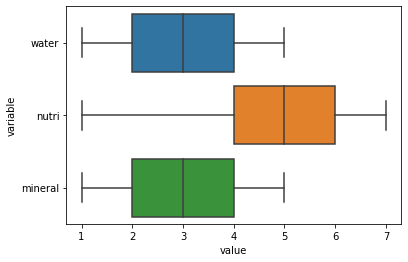

In [37]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1,3]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

F, p = stats.f_oneway(water, nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')
      
raw = {'water':water, 'nutri':nutri, 'mineral':mineral}
anova_df = pd.DataFrame(data=raw)
anova_df = anova_df.melt()
print(anova_df)
ax = sns.boxplot(x=anova_df['value'],y=anova_df['variable'], data=anova_df, orient = 'h')

### Стат. значимые отличия есть, это демонстрирует как ANOVA, так и визуальное отображение

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [38]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [44]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

`userid` - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

`sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки

`retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?

`retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиция для подтверждения ваших выводом. 
</div>

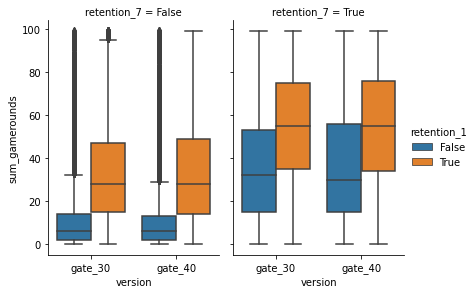

In [58]:
# data30 = data.loc[data['version']=='gate_30'].copy()
# data40 = data.loc[data['version']=='gate_40'].copy()
df = data.loc[data['sum_gamerounds'] < 100].copy()
g = sns.catplot(x="version", y="sum_gamerounds",
                hue="retention_1", col = 'retention_7',
                data=df, kind="box",
                height=4, aspect=.7);

### Небольшие отличия 40 от 30 визуально заметны, но чтобы судить о разнице необходимо воспользоваться стат. тестами

In [106]:
from pylab import rcParams
rcParams['figure.figsize'] = 17,7

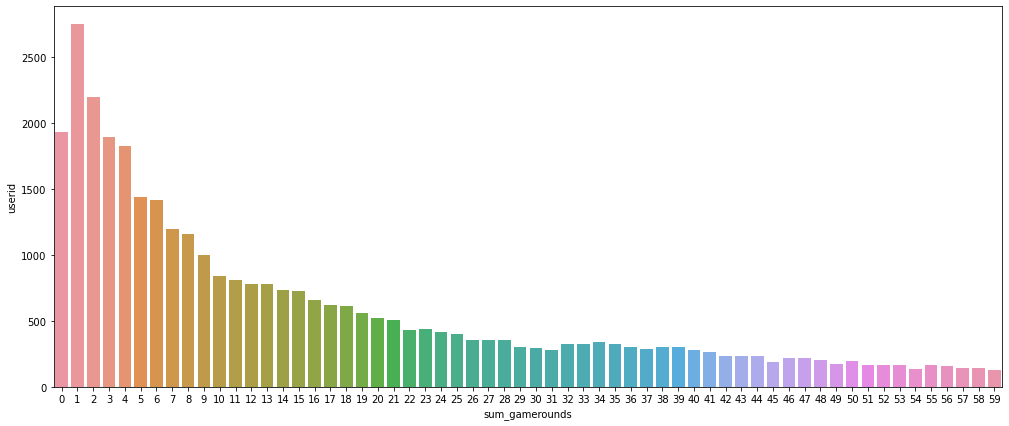

In [103]:
# Подсчет количества игроков для каждого количества раундов для gate_30
plot_df = data[(data['sum_gamerounds'] < 60) & (data['version'] == 'gate_30')].groupby('sum_gamerounds')['userid'].count().reset_index()
ax = sns.barplot(x="sum_gamerounds", y="userid", data=plot_df)


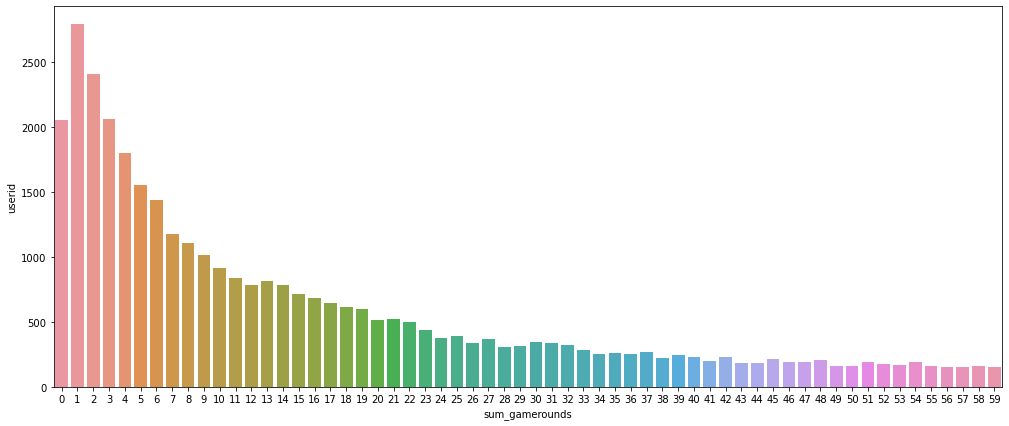

In [104]:
# Подсчет количества игроков для каждого количества раундов для gate_40
plot_df = data[(data['sum_gamerounds'] < 60) & (data['version'] == 'gate_40')].groupby('sum_gamerounds')['userid'].count().reset_index()
ax = sns.barplot(x="sum_gamerounds", y="userid", data=plot_df)

**Ваши выводы**

### Визуально по распределению количества игроков на уровне для двух выборок также не можем однозначно выделить какой-либо из тестов. Однако количество игроков дошедших до первого "гейта" в случае Gate30 - выше.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [108]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

In [109]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

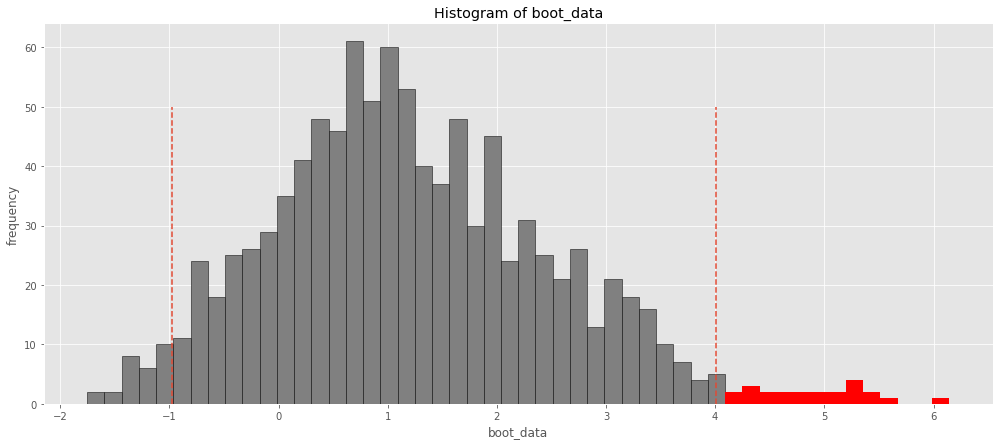

{'boot_data': [-0.6286794609685858,
  0.9115390533975247,
  1.2334630350194553,
  3.278089208380048,
  0.6562025984303897,
  1.1731407593044472,
  0.5322605465057486,
  -0.35314031963771464,
  -1.0570467585570138,
  4.590846138626921,
  1.0275451207984347,
  1.3646815713689024,
  3.51436611048825,
  0.8209677064784893,
  1.343577568203302,
  1.6664468333003584,
  -0.9110774033282771,
  1.5619600342940052,
  1.1119391501242057,
  3.8745191145112003,
  1.5742487194706412,
  0.8185935061223593,
  0.4575611686341753,
  -0.5388995141682604,
  2.998549099782365,
  1.0170370858888962,
  1.0397238892919167,
  2.336323067115127,
  0.8783222317483348,
  -0.36617643825979906,
  1.4589900855151794,
  1.7981709863923145,
  0.6411220295016378,
  1.126228318934248,
  0.6510584976587747,
  2.2758688913803335,
  3.0409109894699817,
  1.8370595088922597,
  -0.9903712985556948,
  0.7799468003253534,
  1.3679790718635274,
  1.5782936534107146,
  3.14948668908967,
  2.637208995581349,
  0.01565213568115368

In [116]:
dff = data[['version','sum_gamerounds']].copy()
get_bootstrap(data_column_1 = dff[dff['version'] == 'gate_30'].sum_gamerounds, data_column_2 = dff[dff['version'] == 'gate_40'].sum_gamerounds)

**Ваши выводы?** 

### Разница между средними для двух групп не имеет стат. значимого отличия. Следовательно стоит оставить вариант А - то есть выполнить 2 основных прицнипа - передых для игроков и более ранний выход на монетизацию